# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

In [1]:
import pandas as pd 
import numpy as np
import functions_data_cleaning_formatting as fn

mkt =  pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv')
mkt.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [2]:
mkt.shape

(10910, 26)

In [3]:
mkt = fn.drop_column(mkt)

In [4]:
mkt.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [5]:
new_name = {'Customer': 'customer', 'State': 'state', 'Customer Lifetime Value': 'customer_lifetime_value', 'Response': 'response', 'Coverage': 'coverage',
       'Education': 'education', 'Effective To Date': 'effective_to_date', 'EmploymentStatus': 'employment_status', 'Gender': 'gender',
       'Income': 'income', 'Location Code': 'location_code', 'Marital Status': 'marital_status', 'Monthly Premium Auto': 'monthly_premium_auto',
       'Months Since Last Claim': 'months_since_last_claim', 'Months Since Policy Inception': 'months_since_policy_inception',
       'Number of Open Complaints': 'n_of_open_complaints', 'Number of Policies': 'number_of_policies', 'Policy Type': 'policy_type',
       'Policy': 'policy', 'Renew Offer Type': 'renew_offer_type', 'Sales Channel': 'sales_channel', 'Total Claim Amount': 'total_claim_amount',
       'Vehicle Class': 'vehicle_class', 'Vehicle Size': 'vehicle_size', 'Vehicle Type': 'vehicle_type'}
mkt = fn.column_rename(mkt, new_name) 

In [6]:
fn.nan_values(mkt)

,column_name,percentage_of_missing_values
0,customer,0.00
1,state,5.78
2,customer_lifetime_value,0.00
3,response,5.78
4,coverage,0.00
5,education,0.00
6,effective_to_date,0.00
7,employment_status,0.00
8,gender,0.00
9,income,0.00


In [7]:
mkt = fn.all_gone(mkt) # to get rid of the rows where all the columns have NaN values

In [8]:
display(round(((mkt.duplicated().sum())/mkt.shape[0]*100),2)) # check if there are duplicates

0.34

In [9]:
mkt.drop_duplicates() # drop them, keep the first

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,n_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [10]:
mkt.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employment_status                   0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
n_of_open_complaints              633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [11]:
print(mkt.dtypes)

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
n_of_open_complaints             float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type    

In [12]:
mkt['effective_to_date'] = pd.to_datetime(mkt['effective_to_date'], format = '%m/%d/%y', errors = 'coerce')

In [13]:
to_round = ['total_claim_amount', 'customer_lifetime_value']
mkt = fn.to_round(mkt, to_round) # rounding the float numbers 

In [14]:
mkt['n_of_open_complaints'].describe()  # since most of the values are 0, I will replace NaN with 0. 

count    10277.000000
mean         0.384256
std          0.912457
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: n_of_open_complaints, dtype: float64

In [15]:
mkt['n_of_open_complaints'] = mkt['n_of_open_complaints'].fillna(0)

In [16]:
mkt['months_since_last_claim'].describe()

count    10277.000000
mean        15.149071
std         10.080349
min          0.000000
25%          6.000000
50%         14.000000
75%         23.000000
max         35.000000
Name: months_since_last_claim, dtype: float64

In [17]:
mean_mslc = mkt['months_since_last_claim'].mean()
mkt['months_since_last_claim'] = mkt['months_since_last_claim'].fillna(mean_mslc) # no extreme values through IQR so substite by mean

In [18]:
new_num = ['n_of_open_complaints', 'months_since_last_claim']
mkt = fn.to_int(mkt, new_num)  # rounding and transform it into int

In [19]:
display(mkt['vehicle_type'].value_counts(dropna=False))

vehicle_type
NaN    5482
A      5428
Name: count, dtype: int64

In [20]:
display(mkt['vehicle_size'].value_counts(dropna=False))

vehicle_size
Medsize    7251
Small      1966
Large      1071
NaN         622
Name: count, dtype: int64

In [21]:
display(mkt['vehicle_class'].value_counts(dropna=False))

vehicle_class
Four-Door Car    5212
Two-Door Car     2118
SUV              2012
NaN               622
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: count, dtype: int64

In [22]:
display(mkt['state'].value_counts(dropna=False))

state
California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
NaN            631
Name: count, dtype: int64

In [23]:
display(mkt['response'].value_counts(dropna=False))

response
No     8813
Yes    1466
NaN     631
Name: count, dtype: int64

In [24]:
# here I would change the NaN for all the categorical values which have them to unknown, I belive having unknown values is better for the data than to have the most commonm value which cause bias.

In [25]:
mkt['vehicle_type'] = mkt['vehicle_type'].fillna('U') # U for unknown 

In [26]:
mkt['vehicle_class'] = mkt['vehicle_class'].fillna('U')

In [27]:
mkt['vehicle_size'] = mkt['vehicle_size'].fillna('U')

In [28]:
mkt['state'] = mkt['state'].fillna('U')

In [29]:
mkt['response'] = mkt['response'].fillna('U')

In [30]:
mkt.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
n_of_open_complaints             0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

In [31]:
mkt.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,n_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.22,No,Basic,College,2011-02-18,Employed,M,48029,...,0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.80,Four-Door Car,Medsize,U
1,KX64629,California,2228.53,No,Basic,College,2011-01-18,Unemployed,F,0,...,0,1,Personal Auto,Personal L3,Offer4,Call Center,744.92,Four-Door Car,Medsize,U
2,LZ68649,Washington,14947.92,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0,2,Personal Auto,Personal L3,Offer3,Call Center,480.00,SUV,Medsize,A
3,XL78013,Oregon,22332.44,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.01,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.07,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,0,7,Personal Auto,Personal L2,Offer1,Branch,707.93,Four-Door Car,Medsize,U


1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [32]:
df = mkt[ (mkt['total_claim_amount'] > 1000) & (mkt['response'] == "Yes")]
df = df.reset_index()
df = df.drop('index', axis = 1)
display(df)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,n_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,OK31456,California,11009.13,Yes,Premium,Bachelor,2011-01-24,Employed,F,51643,...,0,1,Corporate Auto,Corporate L3,Offer2,Agent,1358.40,Luxury Car,Medsize,U
1,YJ16163,Oregon,11009.13,Yes,Premium,Bachelor,2011-01-24,Employed,F,51643,...,0,1,Special Auto,Special L3,Offer2,Agent,1358.40,Luxury Car,Medsize,A
2,GW43195,Oregon,25807.06,Yes,Extended,College,2011-02-13,Employed,F,71210,...,1,2,Personal Auto,Personal L2,Offer1,Branch,1027.20,Luxury Car,Small,A
3,IP94270,Arizona,13736.13,Yes,Premium,Master,2011-02-13,Disabled,F,16181,...,0,8,Personal Auto,Personal L2,Offer1,Web,1261.32,SUV,Medsize,A
4,FJ28407,California,5619.69,Yes,Premium,High School or Below,2011-01-26,Unemployed,M,0,...,0,1,Personal Auto,Personal L1,Offer2,Web,1027.00,SUV,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,FN44127,Oregon,3508.57,Yes,Extended,College,2011-01-05,Medical Leave,M,20978,...,1,1,Personal Auto,Personal L2,Offer2,Branch,1176.28,Four-Door Car,Small,U
63,XZ64172,Oregon,10963.96,Yes,Premium,High School or Below,2011-02-08,Employed,M,55687,...,0,1,Corporate Auto,Corporate L2,Offer1,Agent,1324.80,Luxury SUV,Medsize,U
64,IX60941,Oregon,3508.57,Yes,Extended,College,2011-01-05,Medical Leave,M,20978,...,1,1,Personal Auto,Personal L3,Offer2,Branch,1176.28,Four-Door Car,Small,U
65,QO62792,Oregon,7840.17,Yes,Extended,College,2011-01-14,Employed,M,58414,...,2,1,Personal Auto,Personal L3,Offer2,Agent,1008.00,U,U,U


2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [33]:
filtered = mkt[mkt['response'] == 'Yes']
result = filtered.groupby(['policy_type', 'gender']).agg({'total_claim_amount': 'mean'}).round(2)
display(result)

total_claim_amount
policy_type    gender                    
Corporate Auto F                   433.74
               M                   408.58
Personal Auto  F                   452.97
               M                   457.01
Special Auto   F                   453.28
               M                   429.53

In [34]:
# Considered who said yes to the last marketing campaign, for corporate and special auto, female gender has a higher total claim amount, while for personal auto, male has a slightly higher total claim amount but it is close to the female one.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [35]:
new1 = mkt.drop_duplicates(subset = ['customer', 'state'])

In [36]:
result2 = new1.groupby(['state']).agg({'customer': 'count'})
display(result2) 

,customer
state,
Arizona,1703
California,3150
Nevada,882
Oregon,2601
U,589
Washington,798


In [37]:
result2.loc[result2['customer'] > 500]

,customer
state,
Arizona,1703
California,3150
Nevada,882
Oregon,2601
U,589
Washington,798


4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [38]:
result2 = mkt.groupby(['education', 'gender']).agg({'customer_lifetime_value': ['max', 'median', 'min']})
display(result2) 

customer_lifetime_value                   
                                                max    median      min
education            gender                                           
Bachelor             F                     73225.96  5640.505  1904.00
                     M                     67907.27  5548.030  1898.01
College              F                     61850.19  5623.610  1898.68
                     M                     61134.68  6005.850  1918.12
Doctor               F                     44856.11  5332.460  2395.57
                     M                     32677.34  5577.670  2267.60
High School or Below F                     55277.45  6039.555  2144.92
                     M                     83325.38  6286.735  1940.98
Master               F                     51016.07  5729.860  2417.78
                     M                     50568.26  5579.100  2272.31

In [39]:
# as it can be seen, for both female and male, the high school or below education has the highest median values in the customer lifetime column, specially fqor the male gender.  

In [40]:
#result3 = mkt.pivot_table(index = ['education', 'gender'], values = ['customer_lifetime_value'], aggfunc = ['min', 'max','median'])
#display(result3) # just trying to do it in other ways to learn 

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [41]:
#5. 

result4 = mkt.pivot_table(index = 'months_since_policy_inception', columns = 'state', values = 'number_of_policies', aggfunc = ['count'])
#result4.columns = result4.columns.rename(['number_of_policies', 'state'])
display(result4)

count                                        
state                         Arizona California Nevada Oregon   U Washington
months_since_policy_inception                                                
0                                  16         45      9     21  10          6
1                                  11         34     10     27   8         10
2                                  14         27      9     40   4          8
3                                  28         38     11     40   6         13
4                                  17         37     15     27  11          9
...                               ...        ...    ...    ...  ..        ...
95                                 16         28     19     17   4          8
96                                 11         26      8     21   6          8
97                                  9         20      6     18   3          3
98                                 14         20      5     13   5          7
99                                 24         32      9     16   3          9

[100 rows x 6 columns]

In [42]:
#6.

one = result4.sort_values(by= ('count', 'Arizona'), ascending = False)
one.head(3)

count                                       
state                         Arizona California Nevada Oregon  U Washington
months_since_policy_inception                                               
21                                 41         40      7     28  8          6
59                                 32         52     15     45  8         16
61                                 31         50     12     38  7         13

In [43]:
# this is the maximum I got... I don't know how to deal with the multiindex in order to make the sort_values work

In [44]:
#7.

response_counts = pd.crosstab(mkt['sales_channel'], mkt['response'])
display(response_counts)

response,No,U,Yes
sales_channel,,,
Agent,3148,231,742
Branch,2539,157,326
Call Center,1792,128,221
Web,1334,115,177


In [45]:
result_1 = mkt.groupby(['sales_channel', 'response']).agg({'response': ['count']}).reset_index()
display(result_1) 

sales_channel response      
                          count
0          Agent       No  3148
1          Agent        U   231
2          Agent      Yes   742
3         Branch       No  2539
4         Branch        U   157
5         Branch      Yes   326
6    Call Center       No  1792
7    Call Center        U   128
8    Call Center      Yes   221
9            Web       No  1334
10           Web        U   115
11           Web      Yes   177

**EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
Show DataFrame info.
Describe DataFrame.
Show a plot of the total number of responses.
Show a plot of the response rate by the sales channel.
Show a plot of the response rate by the total claim amount.
Show a plot of the response rate by income.**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# The line down below is needed to prevent matplotlib to open the graph in a seaparate popup window. 
%matplotlib inline

In [47]:
# 1. Show DataFrame info

mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10910 non-null  object        
 2   customer_lifetime_value        10910 non-null  float64       
 3   response                       10910 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective_to_date              10910 non-null  datetime64[ns]
 7   employment_status              10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location_code                  10910 non-null  object        
 11  marital_status 

In [48]:
# 2. Describe DataFrame

mkt.describe().round(2)

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,n_of_open_complaints,number_of_policies,total_claim_amount
count,10910.00,10910,10910.00,10910.00,10910.00,10910.00,10910.00,10910.00,10910.00
mean,8018.24,2011-01-29 22:50:02.749771008,37536.28,93.20,15.14,48.09,0.36,2.98,434.89
min,1898.01,2011-01-01 00:00:00,0.00,61.00,0.00,0.00,0.00,1.00,0.10
25%,4014.45,2011-01-16 00:00:00,0.00,68.00,7.00,24.00,0.00,1.00,271.08
50%,5771.14,2011-01-30 00:00:00,33813.50,83.00,15.00,48.00,0.00,2.00,382.56
75%,8992.78,2011-02-14 00:00:00,62250.75,109.00,23.00,71.00,0.00,4.00,547.20
max,83325.38,2011-02-28 00:00:00,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24
std,6885.08,NaN,30359.20,34.44,9.78,27.94,0.89,2.40,292.18


In [49]:
# 3. Show a plot of the total number of responses

response_count_response = mkt.groupby(['response']).agg({'response': ['count']}).reset_index()
response_count_response.columns = [' '.join(col).strip() for col in response_count_response.columns.values]
response_count_response.rename(columns={'response': 'response', 'response count': 'count'}, inplace=True)
total_response = response_count_response['count'].sum()
new_row = {'response': 'Total', 'count': total_response}
response_count_response = pd.concat([response_count_response, pd.DataFrame([new_row])], ignore_index=True)
display(response_count_response)

,response,count
0,No,8813
1,U,631
2,Yes,1466
3,Total,10910


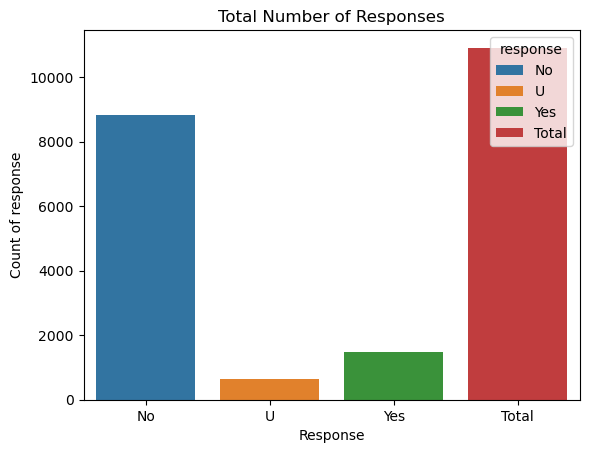

In [50]:
fig, ax = plt.subplots()
sns.barplot(data = response_count_response, x = 'response', y = 'count', hue = 'response', dodge = False)
plt.title('Total Number of Responses')
plt.xlabel('Response')
plt.ylabel('Count of response')
plt.show()

In [51]:
# 4. Show a plot of the response rate by the sales channel. 

response_sales_channel = pd.crosstab(mkt['sales_channel'], mkt['response']).reset_index()
display(response_sales_channel)

response,sales_channel,No,U,Yes
0,Agent,3148,231,742
1,Branch,2539,157,326
2,Call Center,1792,128,221
3,Web,1334,115,177


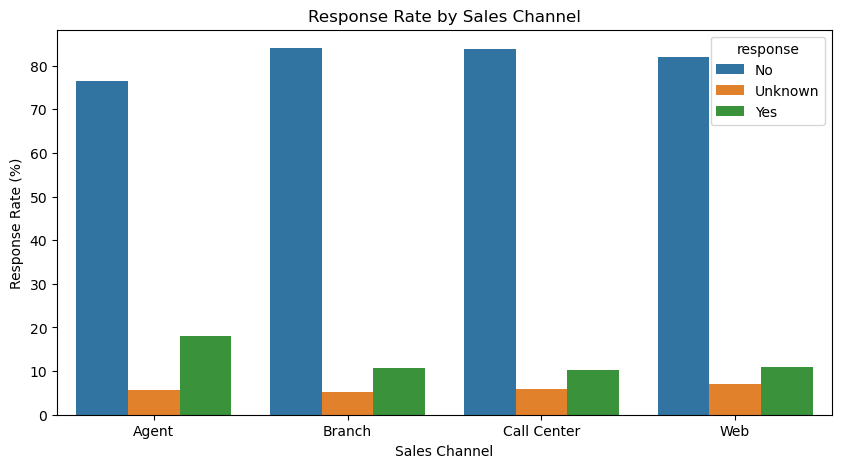

In [52]:
sales_channel_response = pd.DataFrame(response_sales_channel)

sales_channel_response['total_count'] = sales_channel_response[['No', 'U', 'Yes']].sum(axis = 1)

sales_channel_response['No'] = (sales_channel_response['No'] / sales_channel_response['total_count']) * 100
sales_channel_response['Unknown'] = (response_sales_channel['U'] / sales_channel_response['total_count']) * 100
sales_channel_response['Yes'] = (sales_channel_response['Yes'] / sales_channel_response['total_count']) * 100

melted_response_sales_channel = sales_channel_response.melt(id_vars = ['sales_channel'], value_vars =  ['No', 'Unknown', 'Yes'],var_name = 'response', value_name = 'response_rate')

plt.figure(figsize = (10, 5))
sns.barplot(data = melted_response_sales_channel, x = 'sales_channel', y = 'response_rate', hue = 'response')
plt.title('Response Rate by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Response Rate (%)')
plt.show()

In [53]:
# 5. Show a plot of the response rate by the total claim amount. 

response_total_claim = mkt.groupby('response').agg({'total_claim_amount': 'sum'}).round(2).reset_index()
response_total_claim = pd.DataFrame(response_total_claim)

In [54]:
total_claim_sum = response_total_claim['total_claim_amount'].sum()
response_total_claim['claim_amount_rate'] = (response_total_claim['total_claim_amount'] / total_claim_sum).round(2) * 100
response_total_claim

,response,total_claim_amount,claim_amount_rate
0,No,3823543.80,81.0
1,U,265696.17,6.0
2,Yes,655392.29,14.0


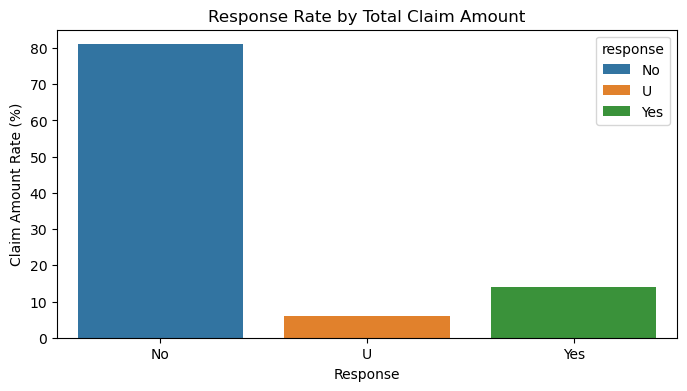

In [55]:
plt.figure(figsize = (8, 4))
sns.barplot(data = response_total_claim, x = 'response', y = 'claim_amount_rate', hue = 'response', dodge = False)
plt.title('Response Rate by Total Claim Amount')
plt.xlabel('Response')
plt.ylabel('Claim Amount Rate (%)')
plt.show()

In [56]:
# 6. Show a plot of the response rate by income.

response_income = mkt.groupby('response').agg({'income': 'sum'}).round(2).reset_index()
response_income = pd.DataFrame(response_income)
total_income_sum = response_income['income'].sum()
response_income['income_rate'] = (response_income['income'] / total_income_sum).round(2) * 100
response_income

,response,income,income_rate
0,No,329599048,80.0
1,U,23633511,6.0
2,Yes,56288308,14.0


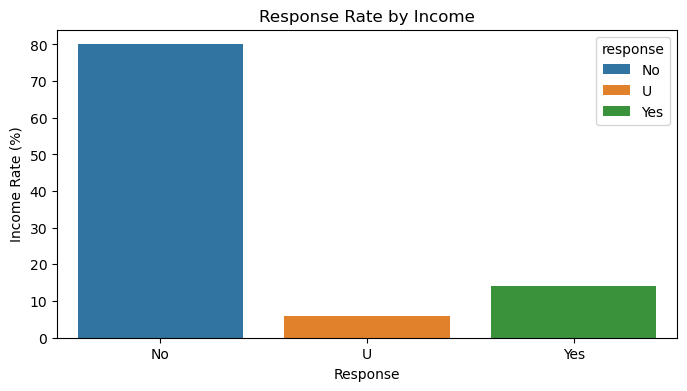

In [57]:
plt.figure(figsize = (8, 4))
sns.barplot(data = response_income, x = 'response', y = 'income_rate', hue = 'response', dodge = False)
plt.title('Response Rate by Income')
plt.xlabel('Response')
plt.ylabel('Income Rate (%)')
plt.show()